In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_9/Professional/FinalProfessionalPlayersDataset2.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,0.000000,14539.0,14394.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
1,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,1.000433,6866.0,9813.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
2,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,0.074367,NaN,NaN,NaN,NaN,...,NaN,NaN,True,Item purchased,NaN,NaN,NaN,NaN,Scorchclaw Pup,JUNGLE
3,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,0.079933,NaN,NaN,NaN,NaN,...,NaN,NaN,True,Item purchased,NaN,NaN,NaN,NaN,Stealth Ward,JUNGLE
4,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,0.086600,NaN,NaN,NaN,NaN,...,NaN,NaN,True,Item purchased,NaN,NaN,NaN,NaN,Health Potion,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54380,KR_6499716626,Red,anonymous 49,kr,Vi,21.752633,14061.0,8984.0,NaN,NaN,...,NaN,NaN,False,Assist,NaN,NaN,NaN,NaN,NaN,JUNGLE
54381,KR_6499716626,Red,anonymous 49,kr,Vi,21.832900,13216.0,9565.0,NaN,NaN,...,NaN,NaN,False,Assist,NaN,NaN,NaN,NaN,NaN,JUNGLE
54382,KR_6499716626,Red,anonymous 49,kr,Vi,21.874033,13330.0,8988.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54383,KR_6499716626,Red,anonymous 49,kr,Vi,22.606467,14340.0,14391.0,12.0,25.0,...,665.0,1578.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [3]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
30,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,8.881567,5197.0,9155.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
47,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,12.790117,12423.0,6194.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
63,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,18.093750,10098.0,2331.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
78,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,22.241800,7291.0,1265.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
85,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,24.723900,6321.0,2487.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54271,KR_6499748759,Red,anonymous 49,kr,Maokai,12.025933,9084.0,1037.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54298,KR_6499748759,Red,anonymous 49,kr,Maokai,20.392433,5363.0,10258.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54345,KR_6499716626,Red,anonymous 49,kr,Vi,10.034350,7654.0,6752.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54369,KR_6499716626,Red,anonymous 49,kr,Vi,18.951050,3810.0,9300.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [4]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 646 matches in which the jungler died at least once


In [5]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

19 players died a total of 3109 times


In [6]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 4.812693498452012 deaths per game


In [4]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
250,EUW1_6391454388,Blue,anonymous 24,euw1,Neeko,14.741700,5137.0,8483.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
264,EUW1_6391454388,Blue,anonymous 24,euw1,Neeko,20.054283,4883.0,4662.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
268,EUW1_6391454388,Blue,anonymous 24,euw1,Neeko,22.054083,2255.0,7613.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275,EUW1_6391454388,Blue,anonymous 24,euw1,Neeko,24.354100,1936.0,1994.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
634,EUW1_6391631575,Blue,anonymous 26,euw1,Gragas,13.344967,5731.0,12626.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54039,KR_6499766868,Blue,anonymous 48,kr,Khazix,5.787733,11851.0,5976.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54069,KR_6499766868,Blue,anonymous 48,kr,Khazix,13.837000,5801.0,7226.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54223,KR_6499704773,Blue,anonymous 48,kr,Khazix,10.527067,11833.0,2766.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54231,KR_6499704773,Blue,anonymous 48,kr,Khazix,14.816667,8094.0,7850.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [5]:
gamesBlueSide = len(np.unique(blueSide_jungler_deaths_df["gameId"]))
gamesBlueSide

285

In [9]:
players_df = np.unique(blueSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 24 played 9 matches
anonymous 26 played 7 matches
anonymous 27 played 13 matches
anonymous 29 played 19 matches
anonymous 30 played 15 matches
anonymous 31 played 32 matches
anonymous 32 played 36 matches
anonymous 34 played 1 matches
anonymous 37 played 8 matches
anonymous 40 played 17 matches
anonymous 43 played 5 matches
anonymous 44 played 1 matches
anonymous 45 played 6 matches
anonymous 46 played 29 matches
anonymous 47 played 11 matches
anonymous 48 played 31 matches
anonymous 49 played 16 matches
anonymous 50 played 2 matches
anonymous 51 played 27 matches


In [10]:
print("Blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSide_jungler_deaths_df["gameId"]))))

Blue side contains 285 matches in which the jungler died at least once


In [11]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_jungler_deaths_df["summoner"])), blueSide_jungler_deaths_df.shape[0]))

19 players died a total of 1402 times on the blue side


In [6]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
30,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,8.881567,5197.0,9155.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
47,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,12.790117,12423.0,6194.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
63,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,18.093750,10098.0,2331.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
78,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,22.241800,7291.0,1265.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
85,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,24.723900,6321.0,2487.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54271,KR_6499748759,Red,anonymous 49,kr,Maokai,12.025933,9084.0,1037.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54298,KR_6499748759,Red,anonymous 49,kr,Maokai,20.392433,5363.0,10258.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54345,KR_6499716626,Red,anonymous 49,kr,Vi,10.034350,7654.0,6752.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54369,KR_6499716626,Red,anonymous 49,kr,Vi,18.951050,3810.0,9300.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [7]:
gamesRedSide = len(np.unique(redSide_jungler_deaths_df["gameId"]))
gamesRedSide

370

In [14]:
players_df = np.unique(redSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_jungler_deaths_df[redSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 24 played 15 matches
anonymous 26 played 13 matches
anonymous 27 played 22 matches
anonymous 29 played 32 matches
anonymous 30 played 31 matches
anonymous 31 played 43 matches
anonymous 32 played 41 matches
anonymous 34 played 2 matches
anonymous 37 played 6 matches
anonymous 40 played 18 matches
anonymous 43 played 5 matches
anonymous 44 played 1 matches
anonymous 45 played 5 matches
anonymous 46 played 34 matches
anonymous 47 played 12 matches
anonymous 48 played 34 matches
anonymous 49 played 18 matches
anonymous 50 played 3 matches
anonymous 51 played 35 matches


In [15]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 370 matches in which the jungler died at least once


In [16]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

19 players died a total of 1707 times on the red side


function to visualize the results

In [17]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Jungle Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Jungle Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [18]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [19]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [20]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [21]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [22]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

---
### Clustering Red Team Victory

In [8]:
redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
30,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,8.881567,5197.0,9155.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
47,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,12.790117,12423.0,6194.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
63,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,18.093750,10098.0,2331.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
78,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,22.241800,7291.0,1265.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
85,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,24.723900,6321.0,2487.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54119,KR_6499753597,Red,anonymous 48,kr,Nidalee,14.319183,3378.0,9233.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54153,KR_6499731532,Red,anonymous 48,kr,Neeko,6.132067,8242.0,7514.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54265,KR_6499748759,Red,anonymous 49,kr,Maokai,10.517050,9115.0,8402.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54271,KR_6499748759,Red,anonymous 49,kr,Maokai,12.025933,9084.0,1037.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [9]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [10]:
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

In [11]:
winRateRedSide = (winsRedSide / gamesRedSide) * 100
winRateRedSide

56.75675675675676

In [27]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

44.112478031634446

In [28]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 won 9 matches on the red side
anonymous 24 has an average of 3.111111111111111 deaths per game when winning on the red side

anonymous 26 won 7 matches on the red side
anonymous 26 has an average of 2.4285714285714284 deaths per game when winning on the red side

anonymous 27 won 9 matches on the red side
anonymous 27 has an average of 4.555555555555555 deaths per game when winning on the red side

anonymous 29 won 23 matches on the red side
anonymous 29 has an average of 4.043478260869565 deaths per game when winning on the red side

anonymous 30 won 19 matches on the red side
anonymous 30 has an average of 2.9473684210526314 deaths per game when winning on the red side

anonymous 31 won 30 matches on the red side
anonymous 31 has an average of 4.333333333333333 deaths per game when winning on the red side

anonymous 32 won 21 matches on the red side
anonymous 32 has an average of 4.142857142857143 deaths per game when winning on the red side

anonymous 34 won 2 matches o

In [29]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 210 matches in which the jungler died at least once
17 players died a total of 753 times on the red side
Victory games on red side contains an average of 3.585714285714286 deaths per game


In [30]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
30,5197.0,9155.0,8.881567
47,12423.0,6194.0,12.790117
63,10098.0,2331.0,18.093750
78,7291.0,1265.0,22.241800
85,6321.0,2487.0,24.723900
...,...,...,...
54119,3378.0,9233.0,14.319183
54153,8242.0,7514.0,6.132067
54265,9115.0,8402.0,10.517050
54271,9084.0,1037.0,12.025933


Time discretization

In [31]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [32]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [33]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [34]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [35]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
30,-0.598522,0.848959,-1
47,1.503174,-0.061798,-1
63,0.826943,-1.249996,0
78,0.010522,-1.577881,0
85,-0.271604,-1.202013,0
...,...,...,...
54119,-1.127581,0.872951,-1
54153,0.287122,0.344213,-1
54265,0.541036,0.617348,-1
54271,0.532019,-1.648010,-1


In [36]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.34806157134215626
Silhouette score for k=3: 0.3378717234566705
Silhouette score for k=4: 0.31553368262529474
Silhouette score for k=5: 0.3244453245376741
Silhouette score for k=6: 0.3260355846198306
Silhouette score for k=7: 0.3247778297667316
Silhouette score for k=8: 0.3237769730052935
Silhouette score for k=9: 0.32441335138881955
Silhouette score for k=10: 0.31219016789143744
Silhouette score for k=11: 0.3349048119658573
Silhouette score for k=12: 0.3407453965800691
Silhouette score for k=13: 0.34654273132700847
Silhouette score for k=14: 0.32849871016912396
Silhouette score for k=15: 0.33970321782496227
Silhouette score for k=16: 0.34125171627732426
Silhouette score for k=17: 0.3467042268591231
Silhouette score for k=18: 0.34681150954426376
Silhouette score for k=19: 0.34303667895487283
Silhouette score for k=20: 0.3445086532203176
Silhouette score for k=25: 0.36102502731442493


K-Means with k = 3

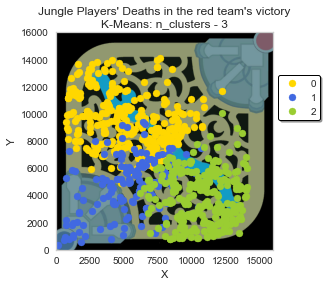

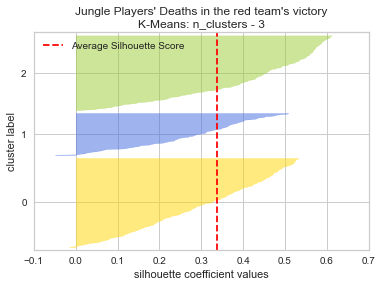

Silhouette score: 0.3378717234566705
0    326
2    273
1    154
Name: cluster, dtype: int64

Inertia: 828.5324534930105

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5288.570552,9357.911043,-0.564417
1,1,5444.863636,4667.987013,0.435065
2,2,10623.805861,3830.846154,-0.673993


In [37]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "royalblue", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [38]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2528.209413,1933.849045,0.559763
1,1,2524.994445,2083.225415,0.521304
2,2,1887.156565,1870.815291,0.520585


In [39]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,12184.0,755.0,14102.0,4945.0,1,-1
1,1,10788.0,158.0,9394.0,332.0,1,-1
2,2,14079.0,6152.0,10050.0,792.0,1,-1


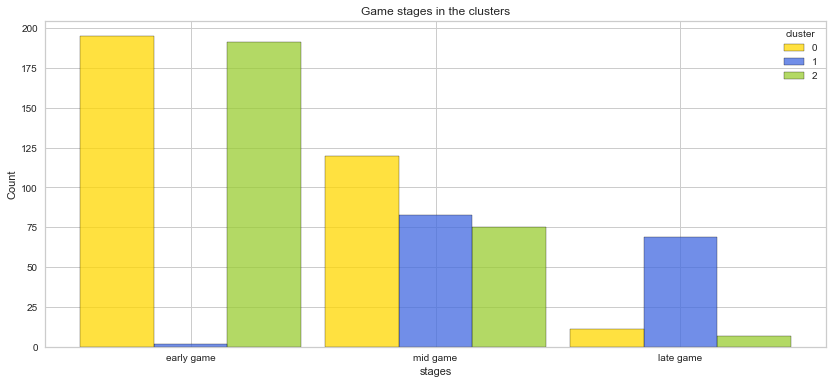

In [40]:
stagesPerClusterV2(redSideVictory_df, colors)

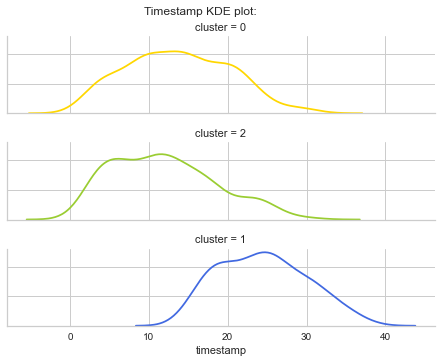

In [41]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [42]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Nidalee,32
Khazix,28
LeeSin,25
Gragas,23
Kindred,11
Viego,11
Neeko,8
Belveth,8
Poppy,7
Sylas,6


Deaths with each champion:

In [43]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Khazix        102
Nidalee        90
Gragas         88
LeeSin         85
Kindred        45
Belveth        42
Viego          41
Sylas          29
Elise          27
Karthus        20
Rengar         20
Poppy          19
Neeko          17
Talon          17
Taliyah        11
Lillia         11
Graves         10
Ekko            9
Vi              8
XinZhao         7
MonkeyKing      7
Nocturne        7
Maokai          7
JarvanIV        6
Diana           6
Rammus          4
Rumble          4
Trundle         4
Hecarim         3
Evelynn         3
Sejuani         2
Shyvana         1
Nautilus        1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [44]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 33 champions when they won on the red side

Cluster 0 - died with 33 champions:
 ['Belveth' 'Diana' 'Ekko' 'Elise' 'Evelynn' 'Gragas' 'Graves' 'Hecarim'
 'JarvanIV' 'Karthus' 'Khazix' 'Kindred' 'LeeSin' 'Lillia' 'Maokai'
 'MonkeyKing' 'Nautilus' 'Neeko' 'Nidalee' 'Nocturne' 'Poppy' 'Rammus'
 'Rengar' 'Rumble' 'Sejuani' 'Shyvana' 'Sylas' 'Taliyah' 'Talon' 'Trundle'
 'Vi' 'Viego' 'XinZhao']
Khazix        48
Nidalee       41
LeeSin        39
Gragas        33
Kindred       20
Belveth       18
Viego         15
Sylas         12
Elise          9
Neeko          9
Lillia         8
Rengar         7
Graves         7
Poppy          6
Talon          6
Nocturne       5
Karthus        5
Maokai         4
Ekko           4
XinZhao        4
MonkeyKing     4
Diana          4
Taliyah        4
Rammus         3
Vi             2
Hecarim        2
JarvanIV       1
Nautilus       1
Sejuani        1
Shyvana        1
Rumble         1
Evelynn        1
Trundle        1
Name: champion, dty

---
### Clustering Red Team Defeat

In [45]:
redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
1134,EUW1_6391147227,Red,anonymous 27,euw1,Nocturne,3.558250,13095.0,7401.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
1145,EUW1_6391147227,Red,anonymous 27,euw1,Nocturne,7.112283,9874.0,4351.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
1151,EUW1_6391147227,Red,anonymous 27,euw1,Nocturne,9.587117,7305.0,7614.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
1158,EUW1_6391147227,Red,anonymous 27,euw1,Nocturne,11.801400,9368.0,7042.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
1172,EUW1_6391147227,Red,anonymous 27,euw1,Nocturne,15.366267,12313.0,3045.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54009,KR_6499719400,Red,anonymous 47,kr,Maokai,14.431500,1400.0,12255.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54020,KR_6499719400,Red,anonymous 47,kr,Maokai,18.007667,9566.0,9242.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54345,KR_6499716626,Red,anonymous 49,kr,Vi,10.034350,7654.0,6752.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54369,KR_6499716626,Red,anonymous 49,kr,Vi,18.951050,3810.0,9300.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [46]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)].copy()

In [47]:
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

55.88752196836555

In [48]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 lost 6 matches on the red side
anonymous 24 has an average of 7.0 deaths per game when losing on the red side

anonymous 26 lost 6 matches on the red side
anonymous 26 has an average of 5.833333333333333 deaths per game when losing on the red side

anonymous 27 lost 13 matches on the red side
anonymous 27 has an average of 7.615384615384615 deaths per game when losing on the red side

anonymous 29 lost 9 matches on the red side
anonymous 29 has an average of 6.111111111111111 deaths per game when losing on the red side

anonymous 30 lost 12 matches on the red side
anonymous 30 has an average of 4.833333333333333 deaths per game when losing on the red side

anonymous 31 lost 13 matches on the red side
anonymous 31 has an average of 6.3076923076923075 deaths per game when losing on the red side

anonymous 32 lost 20 matches on the red side
anonymous 32 has an average of 6.45 deaths per game when losing on the red side

anonymous 37 lost 3 matches on the red side
anonymous 37

In [49]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 160 matches in which the jungler died at least once
18 players died a total of 954 times on the red side
Defeat games on red side contains an average of 5.9625 deaths per game


In [50]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
1134,13095.0,7401.0,3.558250
1145,9874.0,4351.0,7.112283
1151,7305.0,7614.0,9.587117
1158,9368.0,7042.0,11.801400
1172,12313.0,3045.0,15.366267
...,...,...,...
54009,1400.0,12255.0,14.431500
54020,9566.0,9242.0,18.007667
54345,7654.0,6752.0,10.034350
54369,3810.0,9300.0,18.951050


Time discretization

In [51]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [52]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [53]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [54]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [55]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
1134,1.402864,-0.087657,-1
1145,0.418673,-0.970188,-1
1151,-0.366296,-0.026025,-1
1158,0.264063,-0.191536,-1
1172,1.163921,-1.348084,0
...,...,...,...
54009,-2.170596,1.316868,-1
54020,0.324562,0.445044,0
54345,-0.259658,-0.275448,-1
54369,-1.434209,0.461826,0


In [56]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.33252614598592944
Silhouette score for k=3: 0.3223808591669454
Silhouette score for k=4: 0.3099776199007208
Silhouette score for k=5: 0.3214572036470601
Silhouette score for k=6: 0.317878955034084
Silhouette score for k=7: 0.3103397775436237
Silhouette score for k=8: 0.31414671263692157
Silhouette score for k=9: 0.3029673830972938
Silhouette score for k=10: 0.31612518503627185
Silhouette score for k=11: 0.3006893136412858
Silhouette score for k=12: 0.3081645947617765
Silhouette score for k=13: 0.321547715038859
Silhouette score for k=14: 0.3212099811899722
Silhouette score for k=15: 0.3344086234528518
Silhouette score for k=16: 0.336299029364811
Silhouette score for k=17: 0.3503754866261137
Silhouette score for k=18: 0.35247630370949457
Silhouette score for k=19: 0.35340702673031466
Silhouette score for k=20: 0.34840306757125467
Silhouette score for k=25: 0.3555460574391592


K-Means with k = 3

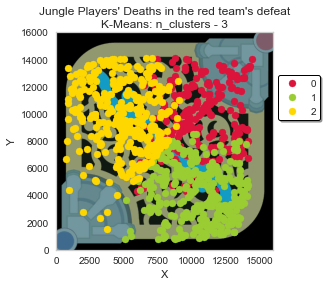

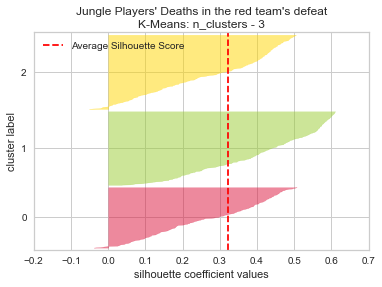

Silhouette score: 0.3223808591669454
2    340
1    337
0    277
Name: cluster, dtype: int64

Inertia: 1087.677532858449

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10204.122744,9489.888087,0.389892
1,1,10531.338279,4170.181009,-0.729970
2,2,5108.867647,9751.500000,-0.391176


In [57]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [58]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2084.759557,2396.689143,0.550325
1,1,2101.345578,1909.314653,0.457147
2,2,2044.531755,2459.934910,0.643916


In [59]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14427.0,5972.0,14087.0,4293.0,1,-1
1,1,14115.0,5050.0,8505.0,759.0,1,-1
2,2,9049.0,735.0,14103.0,1526.0,1,-1


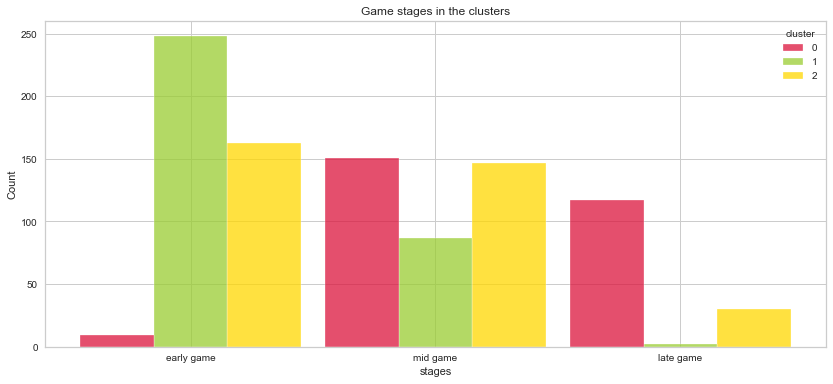

In [60]:
stagesPerClusterV2(redSideDefeat_df, colors)

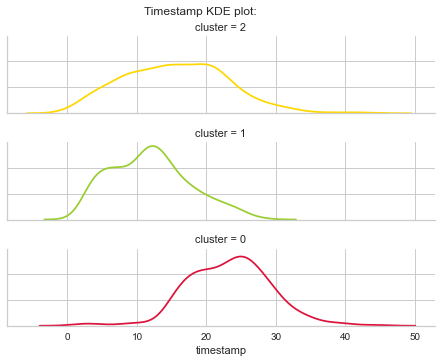

In [61]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [62]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Khazix,26
LeeSin,20
Viego,14
Nidalee,14
Neeko,9
Vi,8
Belveth,8
Gragas,8
Poppy,7
Kindred,5


Deaths with each champion:

In [63]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Khazix      153
LeeSin      125
Nidalee      73
Viego        67
Belveth      58
Gragas       52
Vi           46
Neeko        46
Poppy        44
Kindred      34
Rengar       28
Diana        20
Nocturne     19
Qiyana       16
Gnar         16
Maokai       15
Talon        15
Kayn         14
JarvanIV     14
Elise        10
Lillia       10
Rumble       10
Graves        8
Pantheon      8
Jax           7
Karthus       7
Nautilus      7
Hecarim       7
Ekko          6
Evelynn       6
Sylas         5
Taliyah       5
Sejuani       3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [64]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 33 champions when they won on the red side

Cluster 0 - died with 32 champions:
 ['Belveth' 'Diana' 'Ekko' 'Elise' 'Evelynn' 'Gnar' 'Gragas' 'Graves'
 'Hecarim' 'JarvanIV' 'Jax' 'Karthus' 'Kayn' 'Khazix' 'Kindred' 'LeeSin'
 'Lillia' 'Maokai' 'Nautilus' 'Neeko' 'Nidalee' 'Nocturne' 'Pantheon'
 'Poppy' 'Qiyana' 'Rengar' 'Rumble' 'Sejuani' 'Sylas' 'Talon' 'Vi' 'Viego']
Khazix      38
LeeSin      35
Viego       23
Nidalee     22
Gragas      21
Neeko       18
Belveth     17
Vi           9
Rengar       9
Talon        8
Diana        8
Kindred      7
JarvanIV     7
Gnar         5
Nocturne     5
Poppy        5
Qiyana       4
Karthus      4
Lillia       4
Maokai       4
Kayn         3
Pantheon     3
Elise        3
Ekko         2
Graves       2
Nautilus     2
Hecarim      2
Evelynn      2
Rumble       2
Sylas        1
Sejuani      1
Jax          1
Name: champion, dtype: int64

Cluster 1 - died with 32 champions:
 ['Belveth' 'Diana' 'Ekko' 'Elise' 'Evelynn' 'Gnar' 'Grag

---
### Clustering Blue Team Victory

In [12]:
blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
634,EUW1_6391631575,Blue,anonymous 26,euw1,Gragas,13.344967,5731.0,12626.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
679,EUW1_6391631575,Blue,anonymous 26,euw1,Gragas,26.229300,9484.0,11394.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
689,EUW1_6391631575,Blue,anonymous 26,euw1,Gragas,29.229300,13436.0,14197.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
777,EUW1_6390161538,Blue,anonymous 26,euw1,Nautilus,3.024267,12307.0,1928.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
798,EUW1_6390161538,Blue,anonymous 26,euw1,Nautilus,9.696600,5039.0,8509.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53699,KR_6499692387,Blue,anonymous 46,kr,XinZhao,12.511750,9223.0,7201.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
53716,KR_6499692387,Blue,anonymous 46,kr,XinZhao,16.680867,4972.0,12460.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
53720,KR_6499692387,Blue,anonymous 46,kr,XinZhao,18.345467,1565.0,10900.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54039,KR_6499766868,Blue,anonymous 48,kr,Khazix,5.787733,11851.0,5976.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [13]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)].copy()

In [14]:
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

In [15]:
winRateRedSide = (winsBlueSide / gamesBlueSide) * 100
winRateRedSide

54.03508771929825

In [69]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

43.081312410841655

In [70]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 won 3 matches on the blue side
anonymous 24 has an average of 6.333333333333333 deaths per game when winning on the blue side

anonymous 26 won 4 matches on the blue side
anonymous 26 has an average of 5.25 deaths per game when winning on the blue side

anonymous 27 won 8 matches on the blue side
anonymous 27 has an average of 7.375 deaths per game when winning on the blue side

anonymous 29 won 8 matches on the blue side
anonymous 29 has an average of 4.375 deaths per game when winning on the blue side

anonymous 30 won 10 matches on the blue side
anonymous 30 has an average of 4.2 deaths per game when winning on the blue side

anonymous 31 won 16 matches on the blue side
anonymous 31 has an average of 3.1875 deaths per game when winning on the blue side

anonymous 32 won 21 matches on the blue side
anonymous 32 has an average of 3.5238095238095237 deaths per game when winning on the blue side

anonymous 34 won 1 matches on the blue side
anonymous 34 has an average of 2.0

In [71]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 154 matches in which the jungler died at least once
19 players died a total of 604 times on the blue side
Victory games on blue side contains an average of 3.9220779220779223 deaths per game


In [72]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
634,5731.0,12626.0,13.344967
679,9484.0,11394.0,26.229300
689,13436.0,14197.0,29.229300
777,12307.0,1928.0,3.024267
798,5039.0,8509.0,9.696600
...,...,...,...
53699,9223.0,7201.0,12.511750
53716,4972.0,12460.0,16.680867
53720,1565.0,10900.0,18.345467
54039,11851.0,5976.0,5.787733


Time discretization

In [73]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [74]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [75]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [76]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [77]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
634,-0.730677,1.380894,-1
679,0.377521,1.017699,1
689,1.544481,1.844025,1
777,1.211106,-1.772883,-1
798,-0.935013,0.167200,-1
...,...,...,...
53699,0.300452,-0.218399,-1
53716,-0.954797,1.331957,0
53720,-1.960828,0.872068,0
54039,1.076457,-0.579530,-1


In [78]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3550605051308982
Silhouette score for k=3: 0.34663435990711716
Silhouette score for k=4: 0.3130151238279686
Silhouette score for k=5: 0.3186451726543099
Silhouette score for k=6: 0.3300551254084817
Silhouette score for k=7: 0.3318605403802867
Silhouette score for k=8: 0.3373224211484184
Silhouette score for k=9: 0.3311729768661635
Silhouette score for k=10: 0.32548814191092
Silhouette score for k=11: 0.3223818291509984
Silhouette score for k=12: 0.3211190285944753
Silhouette score for k=13: 0.3352972400937633
Silhouette score for k=14: 0.3217514575685476
Silhouette score for k=15: 0.34159000720232496
Silhouette score for k=16: 0.3425806669208483
Silhouette score for k=17: 0.3518887277749581
Silhouette score for k=18: 0.3426172325347982
Silhouette score for k=19: 0.35462960936488896
Silhouette score for k=20: 0.34507082083992074
Silhouette score for k=25: 0.3613500402438225


K-Means with k = 3

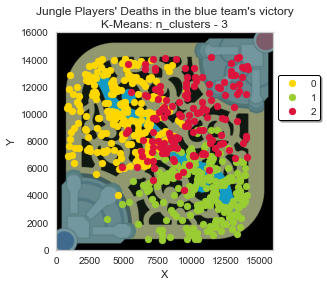

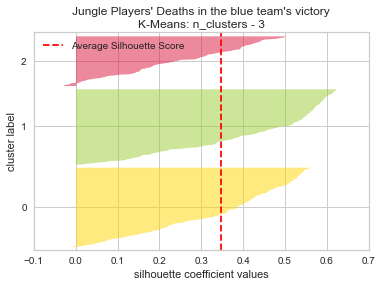

Silhouette score: 0.34663435990711716
0    235
1    222
2    147
Name: cluster, dtype: int64

Inertia: 641.4801869490511

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4940.268085,9996.234043,-0.634043
1,1,10623.666667,4553.486486,-0.752252
2,2,9773.482993,9774.700680,0.401361


In [79]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [80]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2002.042313,2243.457186,0.515825
1,1,2105.316316,1948.238041,0.461948
2,2,2385.108863,2460.708673,0.503861


In [81]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,9541.0,841.0,14044.0,4055.0,1,-1
1,1,14022.0,3791.0,9118.0,750.0,1,-1
2,2,14142.0,4882.0,14210.0,4394.0,1,-1


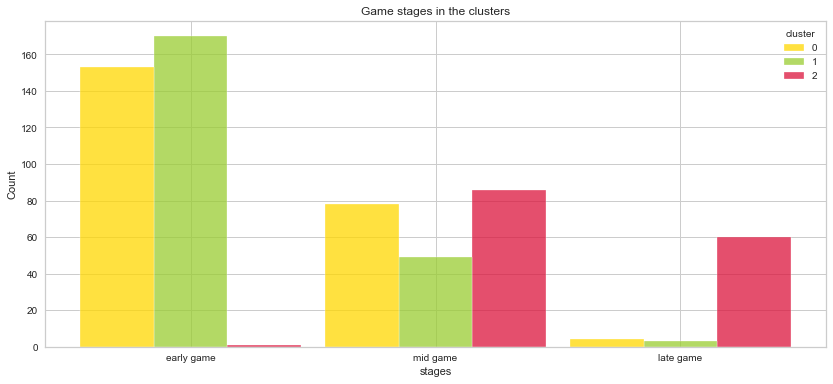

In [82]:
stagesPerClusterV2(blueSideVictory_df, colors)

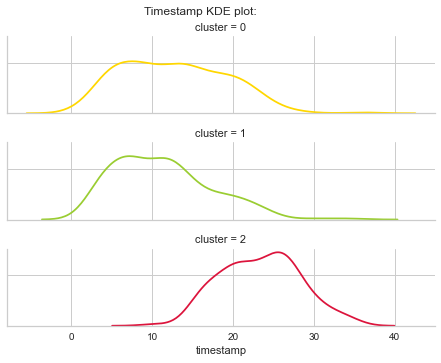

In [83]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [84]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Nidalee,22
LeeSin,20
Khazix,15
Gragas,13
Viego,10
Kindred,9
Neeko,9
Poppy,8
Sylas,7
Belveth,6


Deaths with each champion:

In [85]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Nidalee       80
LeeSin        80
Khazix        68
Sylas         35
Gragas        34
Viego         33
Neeko         33
Kindred       31
Poppy         31
Taliyah       30
Belveth       27
Vi            19
Lillia        15
Nautilus      12
Talon         10
Rengar         9
Elise          8
Rumble         8
JarvanIV       6
Nocturne       5
Karthus        5
XinZhao        4
Trundle        4
Graves         3
Qiyana         3
MonkeyKing     3
Kayn           2
Hecarim        2
MasterYi       2
Sejuani        2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [86]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 30 champions when they won on the red side

Cluster 0 - died with 27 champions:
 ['Belveth' 'Elise' 'Gragas' 'Graves' 'JarvanIV' 'Karthus' 'Khazix'
 'Kindred' 'LeeSin' 'Lillia' 'MasterYi' 'MonkeyKing' 'Nautilus' 'Neeko'
 'Nidalee' 'Nocturne' 'Poppy' 'Qiyana' 'Rengar' 'Rumble' 'Sylas' 'Taliyah'
 'Talon' 'Trundle' 'Vi' 'Viego' 'XinZhao']
LeeSin        37
Nidalee       30
Khazix        26
Kindred       16
Taliyah       14
Poppy         13
Gragas        12
Belveth       11
Neeko         11
Viego         10
Vi             8
Sylas          8
Lillia         8
Nocturne       4
Talon          4
Karthus        3
Trundle        3
Nautilus       3
Elise          2
Graves         2
Qiyana         2
MonkeyKing     2
XinZhao        2
Rengar         1
JarvanIV       1
Rumble         1
MasterYi       1
Name: champion, dtype: int64

Cluster 1 - died with 29 champions:
 ['Belveth' 'Elise' 'Gragas' 'Graves' 'Hecarim' 'JarvanIV' 'Kayn' 'Khazix'
 'Kindred' 'LeeSin' 'Lillia' 'Mast

---
### Clustering Blue Team Defeat

In [87]:
blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
250,EUW1_6391454388,Blue,anonymous 24,euw1,Neeko,14.741700,5137.0,8483.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
264,EUW1_6391454388,Blue,anonymous 24,euw1,Neeko,20.054283,4883.0,4662.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
268,EUW1_6391454388,Blue,anonymous 24,euw1,Neeko,22.054083,2255.0,7613.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275,EUW1_6391454388,Blue,anonymous 24,euw1,Neeko,24.354100,1936.0,1994.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
731,EUW1_6391453426,Blue,anonymous 26,euw1,Nautilus,13.973667,3944.0,11393.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53955,KR_6499755436,Blue,anonymous 47,kr,Neeko,21.523883,5601.0,7554.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
53967,KR_6499755436,Blue,anonymous 47,kr,Neeko,26.242617,1411.0,5915.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54223,KR_6499704773,Blue,anonymous 48,kr,Khazix,10.527067,11833.0,2766.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54231,KR_6499704773,Blue,anonymous 48,kr,Khazix,14.816667,8094.0,7850.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [88]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)].copy()

In [89]:
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

56.918687589158345

In [90]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 lost 6 matches on the blue side
anonymous 24 has an average of 9.0 deaths per game when losing on the blue side

anonymous 26 lost 3 matches on the blue side
anonymous 26 has an average of 7.0 deaths per game when losing on the blue side

anonymous 27 lost 5 matches on the blue side
anonymous 27 has an average of 8.6 deaths per game when losing on the blue side

anonymous 29 lost 11 matches on the blue side
anonymous 29 has an average of 5.363636363636363 deaths per game when losing on the blue side

anonymous 30 lost 5 matches on the blue side
anonymous 30 has an average of 4.8 deaths per game when losing on the blue side

anonymous 31 lost 16 matches on the blue side
anonymous 31 has an average of 5.4375 deaths per game when losing on the blue side

anonymous 32 lost 15 matches on the blue side
anonymous 32 has an average of 5.933333333333334 deaths per game when losing on the blue side

anonymous 37 lost 2 matches on the blue side
anonymous 37 has an average of 9.5 deat

In [91]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 131 matches in which the jungler died at least once
16 players died a total of 798 times on the blue side
Defeat games on blue side contains an average of 6.091603053435114 deaths per game


In [92]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
250,5137.0,8483.0,14.741700
264,4883.0,4662.0,20.054283
268,2255.0,7613.0,22.054083
275,1936.0,1994.0,24.354100
731,3944.0,11393.0,13.973667
...,...,...,...
53955,5601.0,7554.0,21.523883
53967,1411.0,5915.0,26.242617
54223,11833.0,2766.0,10.527067
54231,8094.0,7850.0,14.816667


Time discretization

In [93]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [94]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [95]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [96]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [97]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
250,-0.540792,0.668688,-1
264,-0.615446,-0.524644,0
268,-1.387848,0.396979,0
275,-1.481606,-1.357884,0
731,-0.891430,1.577507,-1
...,...,...,...
53955,-0.404417,0.378553,0
53967,-1.635910,-0.133321,1
54223,1.427246,-1.116782,-1
54231,0.328307,0.470997,-1


In [98]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3257719296085633
Silhouette score for k=3: 0.3432984408218047
Silhouette score for k=4: 0.30035842986194433
Silhouette score for k=5: 0.3112789389749294
Silhouette score for k=6: 0.3211909884917501
Silhouette score for k=7: 0.31301072315281897
Silhouette score for k=8: 0.3079792205672133
Silhouette score for k=9: 0.3015047280246695
Silhouette score for k=10: 0.3147907310928198
Silhouette score for k=11: 0.31339523368658584
Silhouette score for k=12: 0.33031194241284184
Silhouette score for k=13: 0.33608250564262854
Silhouette score for k=14: 0.3315054003087988
Silhouette score for k=15: 0.34098903432760175
Silhouette score for k=16: 0.3488448633085092
Silhouette score for k=17: 0.3387175083036948
Silhouette score for k=18: 0.3441060564348524
Silhouette score for k=19: 0.3589415889545824
Silhouette score for k=20: 0.36138536167735874
Silhouette score for k=25: 0.36709908523170753


K-Means with k = 3

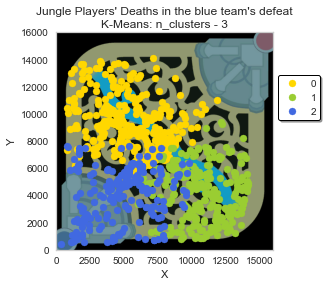

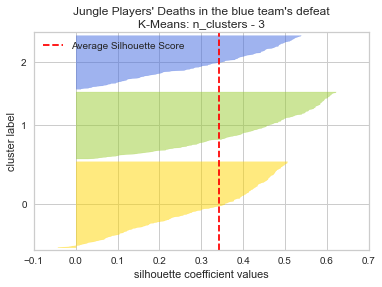

Silhouette score: 0.3432984408218047
0    332
1    259
2    207
Name: cluster, dtype: int64

Inertia: 900.4798181724746

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5365.948795,9381.298193,-0.250000
1,1,10758.316602,4271.459459,-0.633205
2,2,4829.603865,4057.623188,0.478261


In [99]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [100]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2262.756915,1893.228165,0.681622
1,1,1904.096198,1937.050234,0.542248
2,2,2283.476745,1919.082368,0.554525


In [101]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,11835.0,800.0,14121.0,5489.0,1,-1
1,1,14142.0,6025.0,9396.0,758.0,1,-1
2,2,9824.0,394.0,7640.0,461.0,1,-1


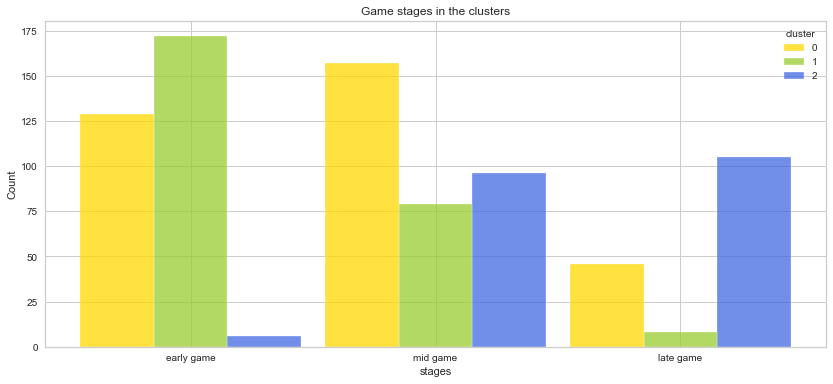

In [102]:
stagesPerClusterV2(blueSideDefeat_df, colors)

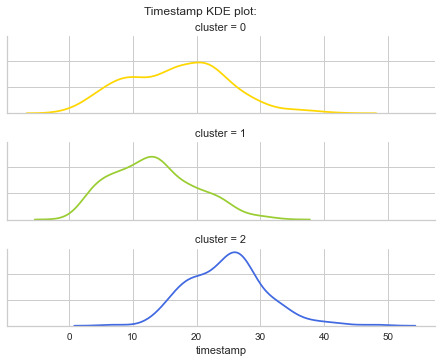

In [103]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [104]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Nidalee,23
LeeSin,15
Gragas,12
Neeko,12
Khazix,12
Viego,11
Poppy,8
Kindred,7
Graves,5
Elise,4


Deaths with each champion:

In [105]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Nidalee       144
LeeSin         93
Gragas         73
Viego          70
Neeko          64
Khazix         63
Kindred        53
Poppy          48
Sion           27
Elise          25
Graves         23
Belveth        21
Nautilus       15
Vi             15
Sylas          13
Rumble          9
Talon           8
Diana           8
MonkeyKing      8
Sejuani         7
Nocturne        6
XinZhao         5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [106]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 22 champions when they won on the red side

Cluster 0 - died with 22 champions:
 ['Belveth' 'Diana' 'Elise' 'Gragas' 'Graves' 'Khazix' 'Kindred' 'LeeSin'
 'MonkeyKing' 'Nautilus' 'Neeko' 'Nidalee' 'Nocturne' 'Poppy' 'Rumble'
 'Sejuani' 'Sion' 'Sylas' 'Talon' 'Vi' 'Viego' 'XinZhao']
Nidalee       56
LeeSin        42
Gragas        36
Kindred       27
Viego         27
Khazix        26
Neeko         24
Poppy         13
Elise         10
Graves         9
Belveth        8
Nautilus       8
Sion           8
Vi             7
Sejuani        6
Talon          5
Nocturne       4
XinZhao        4
Rumble         3
Diana          3
Sylas          3
MonkeyKing     3
Name: champion, dtype: int64

Cluster 1 - died with 21 champions:
 ['Belveth' 'Diana' 'Elise' 'Gragas' 'Graves' 'Khazix' 'Kindred' 'LeeSin'
 'MonkeyKing' 'Nautilus' 'Neeko' 'Nidalee' 'Nocturne' 'Poppy' 'Rumble'
 'Sejuani' 'Sion' 'Sylas' 'Talon' 'Vi' 'Viego']
Nidalee       43
LeeSin        28
Viego         27
Poppy

---

### Blue Win Rate vs Red Win Rate

In [16]:
wins_df = jungler_deaths_df[jungler_deaths_df["victory"] == True]
wins_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
30,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,8.881567,5197.0,9155.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
47,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,12.790117,12423.0,6194.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
63,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,18.093750,10098.0,2331.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
78,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,22.241800,7291.0,1265.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
85,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,24.723900,6321.0,2487.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54119,KR_6499753597,Red,anonymous 48,kr,Nidalee,14.319183,3378.0,9233.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54153,KR_6499731532,Red,anonymous 48,kr,Neeko,6.132067,8242.0,7514.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54265,KR_6499748759,Red,anonymous 49,kr,Maokai,10.517050,9115.0,8402.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54271,KR_6499748759,Red,anonymous 49,kr,Maokai,12.025933,9084.0,1037.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [17]:
wins = len(np.unique(wins_df["gameId"]))
wins

364

In [18]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 57.692307692307686 vs Blue: 42.30769230769231


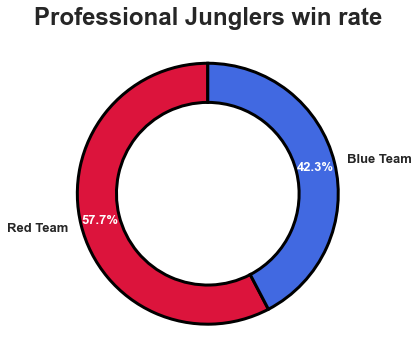

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Professional Junglers win rate', fontsize=24, loc='center', fontweight="bold")

plt.show()